# Test A/B Para una tienda on-line
## Introducción y metodología 

Para abordar este proyecto, vamos a dividirlo en dos partes principales: priorización de hipótesis y análisis del test A/B. Comencemos con la primera parte: priorización de hipótesis utilizando los frameworks ICE y RICE.

__Parte 1: Priorización de Hipótesis__

1. Carga de Datos y Preprocesamiento:

   - Cargaremos el archivo hypotheses_us.csv para obtener las hipótesis y sus respectivos valores de Reach, Impact, Confidence y Effort.
   - Verificaremos y limpiaremos los datos si es necesario para evitar errores en los conjuntos de datos originales.
 
 
2. Aplicación del Framework ICE:

   - Calcularemos la puntuación ICE para cada hipótesis
   - Ordenaremos las hipótesis en orden descendente según la puntuación ICE para priorizarlas.


3. Aplicación del Framework RICE:

   - Calcularemos la puntuación RICE para cada hipótesis
   - Ordenaremos las hipótesis en orden descendente según la puntuación RICE para priorizarlas.

4. Comparación de Priorización ICE vs RICE:

   - Analizaremos cómo cambia la priorización de las hipótesis al utilizar RICE en lugar de ICE.
   - Explicaremos los cambios observados en la priorización debido a la inclusión del parámetro Reach en RICE.
   
__Parte 2. Análisis de test A/B__


Analizaremos el test A/B y para tomar las decisiones basadas en los resultados.

## Parte 1: Priorización de Hipótesis
### Carga de Datos y Preprocesamiento

Primero, carguemos y revisemos los datos del archivo hypotheses_us.csv para asegurarnos de que estén listos para el análisis.

In [1]:
#Importar las librerias necesarias
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# Cargar el archivo de hipótesis
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')

# Mostrar las primeras filas para verificar la estructura y los datos
print(hypotheses.head())
print()
print(hypotheses.info())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+

### Aplicación del Framework ICE
Calcularemos la puntuación ICE para cada hipótesis y las ordenaremos en orden descendente según esta puntuación.

In [3]:
# Calcular ICE para cada hipótesis
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar hipótesis por ICE en orden descendente
hypotheses_sorted_ICE = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar resultados ordenados por ICE
print("Hipótesis ordenadas por ICE:")
print(hypotheses_sorted_ICE[['Hypothesis', 'ICE']])

Hipótesis ordenadas por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### Aplicación del Framework RICE
Ahora calcularemos la puntuación RICE para cada hipótesis y las ordenaremos en orden descendente según esta puntuación.

In [4]:
# Calcular RICE para cada hipótesis
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar hipótesis por RICE en orden descendente
hypotheses_sorted_RICE = hypotheses.sort_values(by='RICE', ascending=False)

# Mostrar resultados ordenados por RICE
print("\nHipótesis ordenadas por RICE:")
print(hypotheses_sorted_RICE[['Hypothesis', 'RICE']])



Hipótesis ordenadas por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Cambios en la priorización de hipótesis al utilizar RICE en lugar de ICE

Para mostrar cómo cambia la priorización de hipótesis al utilizar el framework RICE en lugar de ICE, primero compararemos las clasificaciones obtenidas con cada método y luego explicaremos los cambios observados.

In [5]:
# Mostrar hipótesis ordenadas por ICE
print("Hipótesis ordenadas por ICE:")
print(hypotheses_sorted_ICE[['Hypothesis', 'ICE']])
print()

# Mostrar hipótesis ordenadas por RICE
print("Hipótesis ordenadas por RICE:")
print(hypotheses_sorted_RICE[['Hypothesis', 'RICE']])
print()

# Comparar las clasificaciones
print("Comparación de clasificaciones:")
ice_ranking = hypotheses_sorted_ICE[['Hypothesis', 'ICE']].reset_index(drop=True)
rice_ranking = hypotheses_sorted_RICE[['Hypothesis', 'RICE']].reset_index(drop=True)

comparison = pd.merge(ice_ranking, rice_ranking, left_index=True, right_index=True, suffixes=('_ICE', '_RICE'))
comparison['Rank_ICE'] = comparison.index + 1
comparison['Rank_RICE'] = comparison.index + 1

print(comparison)

Hipótesis ordenadas por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

Hipótesis ordenadas por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0


### Explicación de los cambios

Observamos que las clasificaciones de las hipótesis cambian significativamente al utilizar `RICE` en lugar de `ICE`. Algunas hipótesis que tenían una alta prioridad según `ICE` han bajado en la lista al usar `RICE`, y viceversa.

La principal diferencia entre los frameworks `ICE` y `RICE` es el factor `Reach` (alcance). ICE no considera el alcance de una hipótesis, mientras que `RICE` sí lo hace. El alcance mide cuántos usuarios se verán afectados por la implementación de la hipótesis.

Por ejemplo, la hipótesis `Add a subscription form to all the main pages` tiene un alcance muy alto (9), lo que la coloca en el primer lugar con el framework `RICE`, mientras que estaba en el tercer lugar con `ICE`. Esto demuestra que cuando consideramos cuántos usuarios se verán afectados, algunas hipótesis pueden parecer mucho más valiosas.

Por otro lado, hipótesis como `Launch a promotion that gives users discounts` mantienen una alta clasificación en ambos frameworks porque tienen buenos valores tanto en impacto como en confianza, además de un esfuerzo relativamente bajo.

En resumen, el uso del framework `RICE` puede cambiar significativamente la priorización de hipótesis al considerar el factor de alcance, asegurando que las hipótesis que impacten a más usuarios reciban una mayor prioridad.

## Parte 2. Análisis de test A/B
### cargar datos

In [6]:
# Cargar los datos
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')

# Convertir la columna 'date' a formato datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

# Eliminar usuarios duplicados dentro de los grupos
orders = orders.drop_duplicates(subset=['visitorId', 'group'])

# Verificar la estructura de los datos
print(orders.head())
print(orders.info())
print()
print(visitors.head())
print(visitors.info())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1089 non-null   int64         
 1   visitorId      1089 non-null   int64         
 2   date           1089 non-null   datetime64[ns]
 3   revenue        1089 non-null   float64       
 4   group          1089 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 51.0+ KB
None

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-0

### Ingreso Acumulado por Grupo

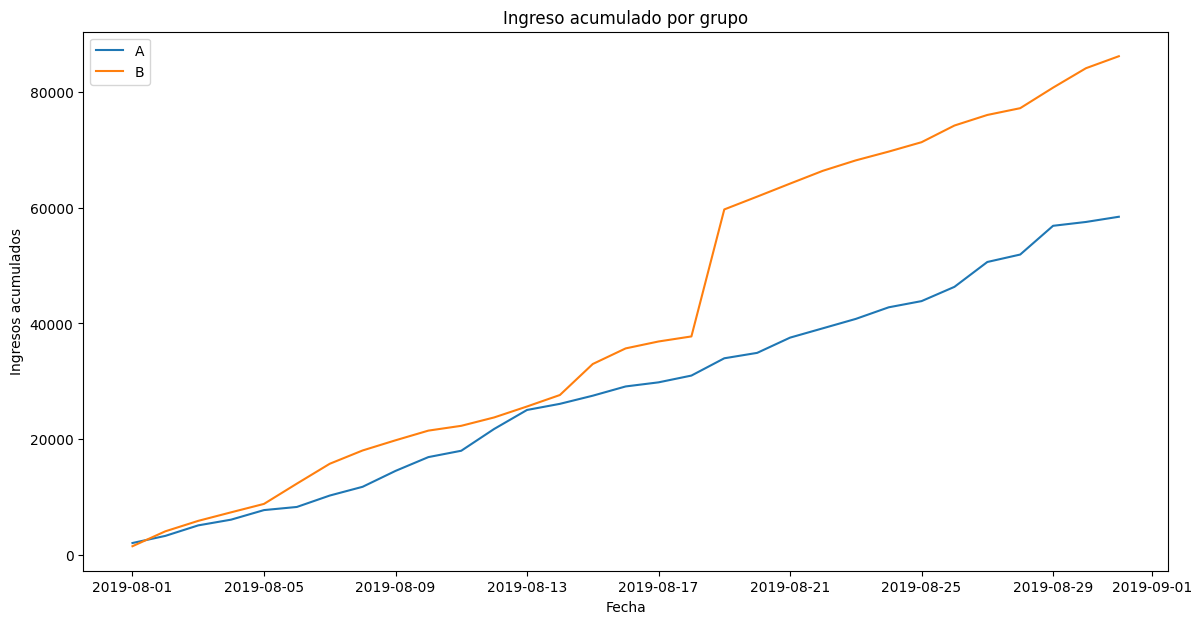

In [7]:
# Crear ingresos acumulados por grupo
cumulativeRevenueA = orders[orders['group'] == 'A'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()
cumulativeRevenueA['group'] = 'A'

cumulativeRevenueB = orders[orders['group'] == 'B'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()
cumulativeRevenueB['group'] = 'B'

cumulativeRevenue = pd.concat([cumulativeRevenueA, cumulativeRevenueB])

# Graficar ingresos acumulados
plt.figure(figsize=(14, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')
plt.show()

__Conclusiones__

- Los ingresos acumulados por grupo aumentaron constantemente durante el período de tiempo mostrado en el gráfico.
- El mayor aumento en los ingresos acumulados se produjo entre el 25 de agosto y el 1 de septiembre de 2019.
- Los ingresos acumulados parecen estar correlacionados con la fecha.


__Conjeturas__

- Es posible que el aumento en los ingresos acumulados se deba a una campaña de marketing o a una promoción especial.
- Es posible que el aumento en los ingresos acumulados se deba a un cambio en la economía.
- Es posible que el aumento en los ingresos acumulados se deba a un cambio en los hábitos de compra de los consumidores.

### Tamaño de Pedido Promedio Acumulado por Grupo

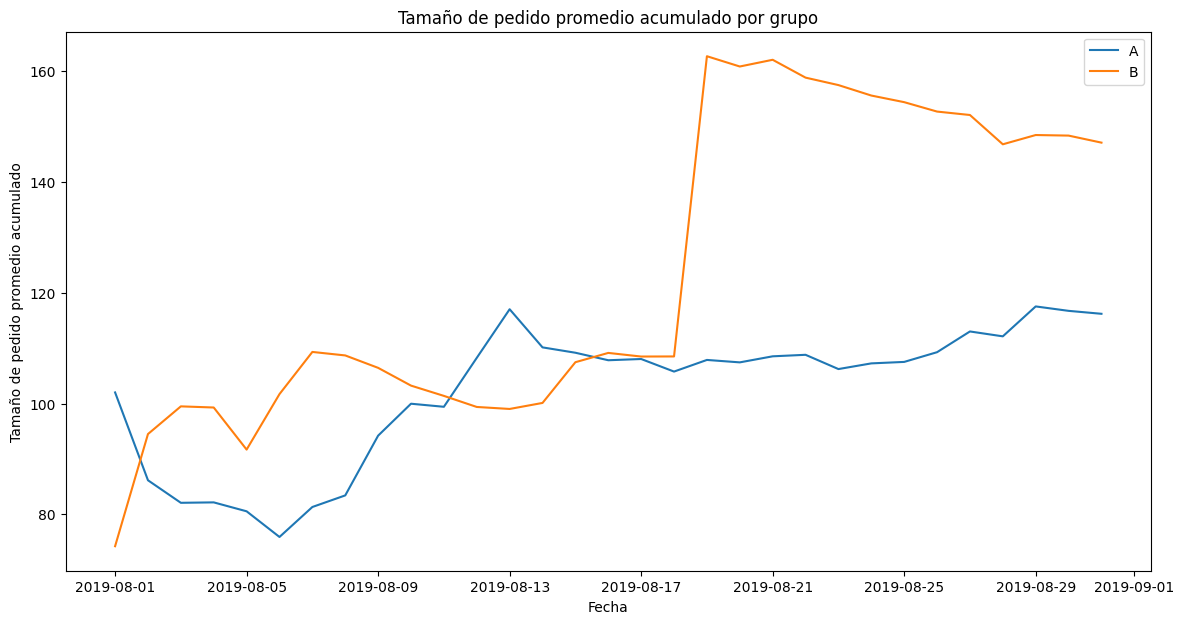

In [8]:
# Crear tamaño de pedido promedio acumulado por grupo
cumulativeOrdersA = orders[orders['group'] == 'A'].groupby('date').agg({'transactionId': 'count', 'revenue': 'sum'}).cumsum().reset_index()
cumulativeOrdersA['avg_order'] = cumulativeOrdersA['revenue'] / cumulativeOrdersA['transactionId']

cumulativeOrdersB = orders[orders['group'] == 'B'].groupby('date').agg({'transactionId': 'count', 'revenue': 'sum'}).cumsum().reset_index()
cumulativeOrdersB['avg_order'] = cumulativeOrdersB['revenue'] / cumulativeOrdersB['transactionId']

# Graficar tamaño de pedido promedio acumulado
plt.figure(figsize=(14, 7))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['avg_order'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['avg_order'], label='B')
plt.legend()
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio acumulado')
plt.show()


__Conclusiones__

- El tamaño de pedido promedio acumulado de ambos grupos A y B aumentó constantemente durante el período de tiempo analizado.
- El grupo A experimentó un mayor crecimiento en el tamaño de pedido promedio acumulado en comparación con el grupo B.
- La diferencia en el tamaño de pedido promedio acumulado entre ambos grupos se amplió con el paso del tiempo.

__Conjeturas__

- El aumento en el tamaño de pedido promedio acumulado podría estar relacionado con una estrategia de marketing o promoción especial implementada por la empresa.
- Es posible que el grupo A haya recibido un mayor enfoque en las estrategias de marketing o ventas, lo que se traduce en un mayor crecimiento en el tamaño de pedido promedio acumulado.
- Las diferencias en el tamaño de pedido promedio acumulado entre ambos grupos podrían deberse a factores como la segmentación de clientes, la estrategia de precios o la variedad de productos ofrecidos.

### Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado

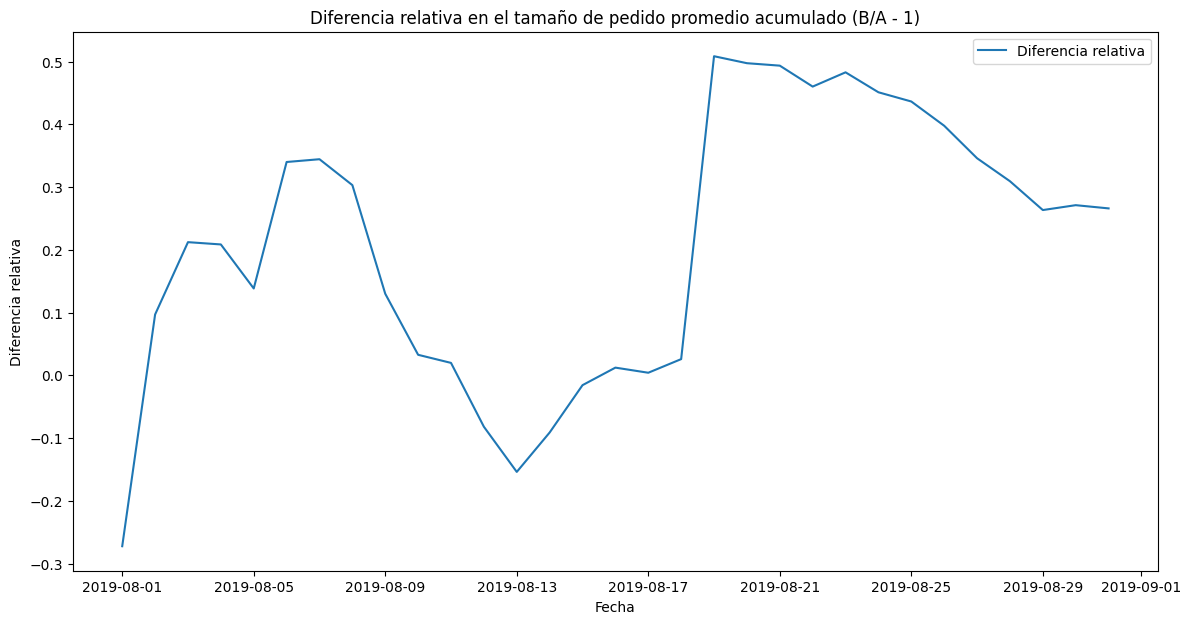

In [9]:
# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado
relativeDiff = cumulativeOrdersB['avg_order'] / cumulativeOrdersA['avg_order'] - 1

# Graficar la diferencia relativa
plt.figure(figsize=(14, 7))
plt.plot(cumulativeOrdersA['date'], relativeDiff, label='Diferencia relativa')
plt.legend()
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado (B/A - 1)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.show()

__Conclusiones__

- La diferencia relativa en el tamaño de pedido promedio acumulado entre ambos grupos A y B se mantuvo relativamente estable durante la primera mitad del período analizado, oscilando entre 0.1 y 0.2.
- A partir del 17 de agosto de 2019, se observa un aumento significativo en la diferencia relativa, llegando a un máximo de 0.45 el 25 de agosto de 2019.
- La diferencia relativa se mantiene elevada durante la última semana del período analizado, oscilando entre 0.3 y 0.4.

### Tasa de Conversión Diaria por Grupo

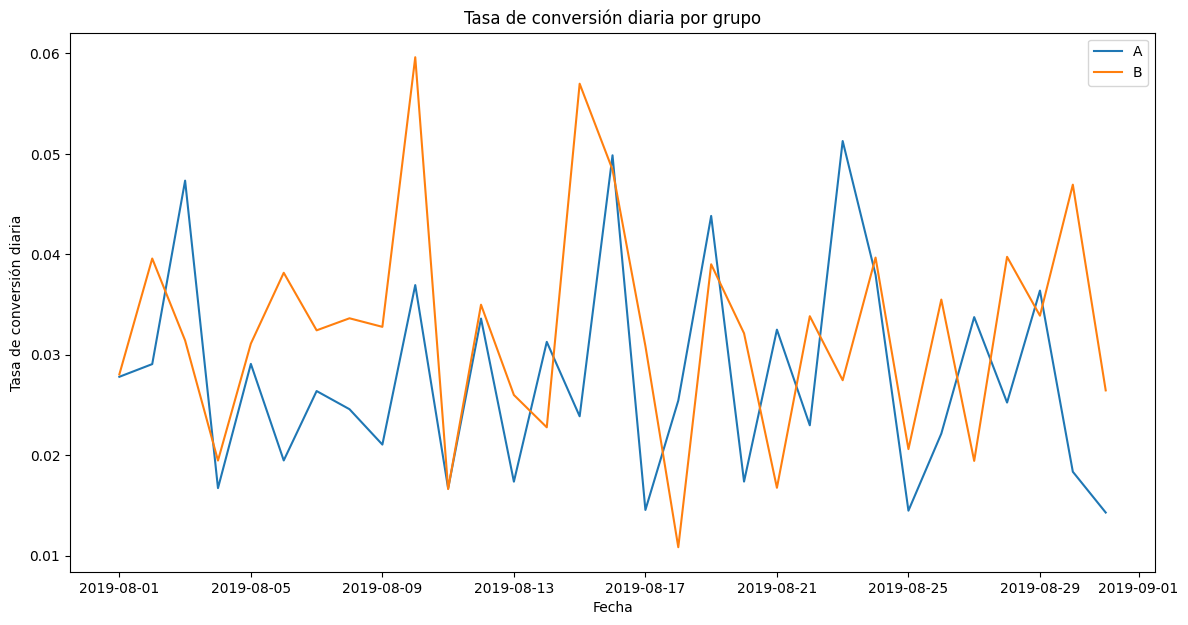

In [10]:
# Calcular la tasa de conversión diaria
dailyOrders = orders.groupby(['date', 'group']).agg({'transactionId': 'count'}).reset_index()
dailyVisitors = visitors.groupby(['date', 'group']).agg({'visits': 'sum'}).reset_index()

# Unir las tablas
dailyData = pd.merge(dailyOrders, dailyVisitors, on=['date', 'group'])
dailyData['conversion_rate'] = dailyData['transactionId'] / dailyData['visits']

# Separar por grupo
dailyDataA = dailyData[dailyData['group'] == 'A']
dailyDataB = dailyData[dailyData['group'] == 'B']

# Graficar tasas de conversión diarias
plt.figure(figsize=(14, 7))
plt.plot(dailyDataA['date'], dailyDataA['conversion_rate'], label='A')
plt.plot(dailyDataB['date'], dailyDataB['conversion_rate'], label='B')
plt.legend()
plt.title('Tasa de conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión diaria')
plt.show()


__Conclusiones__

- La tasa de conversión diaria del grupo A fue superior a la del grupo B durante la mayor parte del período de tiempo analizado.
- La diferencia en la tasa de conversión diaria entre ambos grupos se amplió con el paso del tiempo.
- Se observa una tendencia decreciente en la tasa de conversión diaria de ambos grupos a partir del 25 de agosto de 2019.

### Gráfico de Dispersión del Número de Pedidos por Usuario

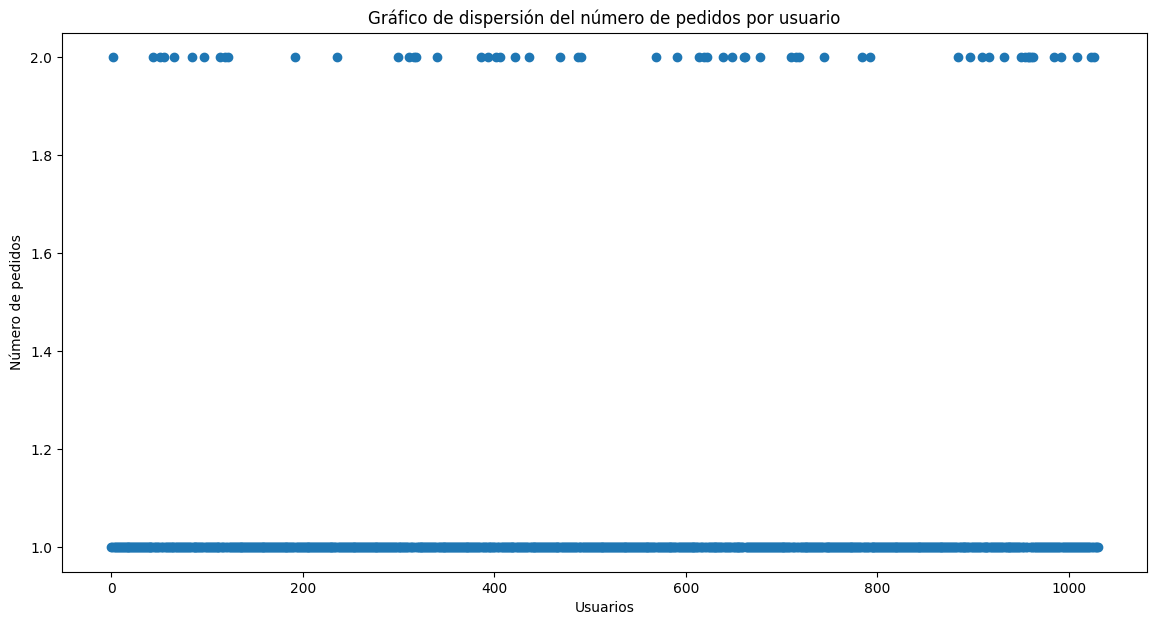

In [11]:
# Calcular el número de pedidos por usuario
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()

# Graficar el número de pedidos por usuario
plt.figure(figsize=(14, 7))
plt.scatter(range(0, len(ordersByUsers)), ordersByUsers['transactionId'])
plt.title('Gráfico de dispersión del número de pedidos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Número de pedidos')
plt.show()

__Conclusiones__

- La mayoría de los usuarios realizan un número bajo de pedidos.
- Existe un pequeño grupo de usuarios que realiza un gran número de pedidos.
- Se observa una tendencia ligeramente positiva en la relación entre el número de pedidos y el número de usuarios, lo que significa que a medida que aumenta el número de pedidos realizados por un usuario, también aumenta el número de usuarios que realizan ese número de pedidos.


__Conjeturas__

- El pequeño grupo de usuarios que realiza un gran número de pedidos podría ser clientes leales o mayoristas.
- La tendencia ligeramente positiva en la relación entre el número de pedidos y el número de usuarios podría indicar que la empresa está logrando fidelizar a sus clientes y que estos están realizando más pedidos con el tiempo.

### Percentiles y Anomalías en el Número de Pedidos por Usuario

In [12]:
percentiles_orders = np.percentile(ordersByUsers['transactionId'], [95, 99])
print("Percentiles 95 y 99 para el número de pedidos por usuario:", percentiles_orders)

Percentiles 95 y 99 para el número de pedidos por usuario: [2. 2.]


### Gráfico de Dispersión de los Precios de los Pedidos

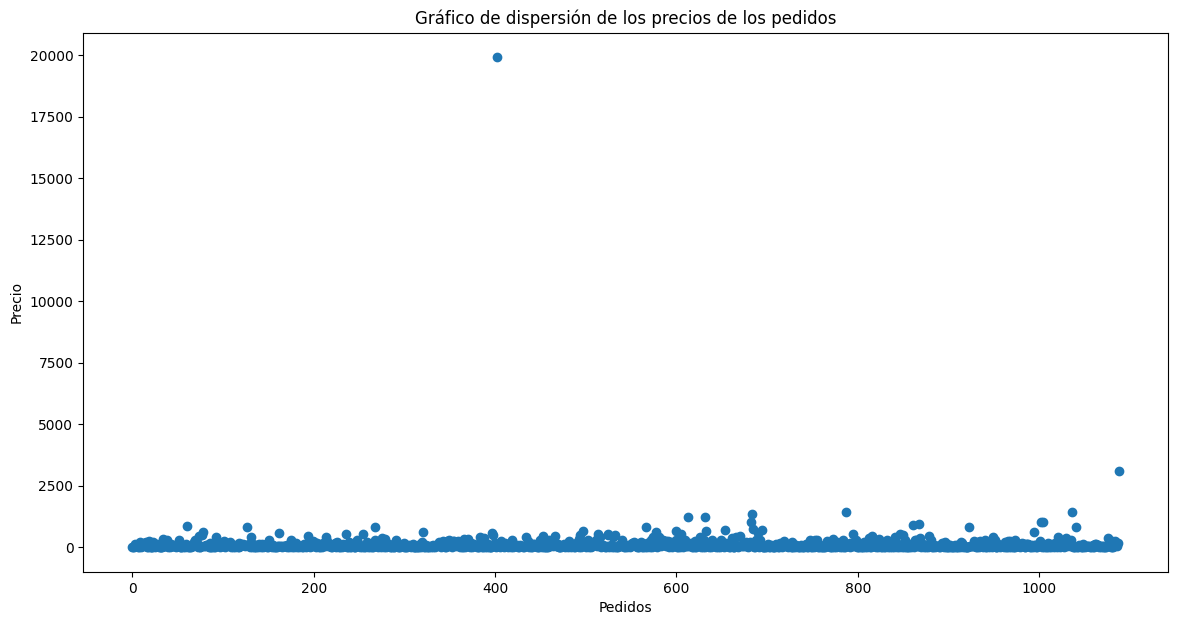

In [13]:
# Graficar los precios de los pedidos
plt.figure(figsize=(14, 7))
plt.scatter(range(0, len(orders['revenue'])), orders['revenue'])
plt.title('Gráfico de dispersión de los precios de los pedidos')
plt.xlabel('Pedidos')
plt.ylabel('Precio')
plt.show()

__Conclusiones__

- La mayoría de los pedidos tienen un precio bajo.
- Existe un pequeño grupo de pedidos con un precio alto.
- Se observa una tendencia ligeramente positiva en la relación entre el precio y el número de pedidos, lo que significa que a medida que aumenta el precio de un pedido, también aumenta el número de pedidos realizados con ese precio.

__Conjeturas__

- El pequeño grupo de pedidos con un precio alto podría corresponder a productos o servicios de mayor valor o a pedidos de gran volumen.
- La tendencia ligeramente positiva en la relación entre el precio y el número de pedidos podría indicar que la empresa está logrando vender productos o servicios de mayor valor a algunos clientes.

### Percentiles y Anomalías en los Precios de los Pedidos

In [14]:
percentiles_revenue = np.percentile(orders['revenue'], [95, 99])
print("Percentiles 95 y 99 para los precios de los pedidos:", percentiles_revenue)

Percentiles 95 y 99 para los precios de los pedidos: [431.66  908.704]


### Significancia Estadística de la Diferencia en la Conversión y Tamaño Promedio de Pedido entre los Grupos

In [15]:
# Conversión entre grupos
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

p_value_conversion = stats.mannwhitneyu(ordersByUsersA['orders'], ordersByUsersB['orders'])[1]
print("Valor p para la diferencia en conversión:", round(p_value_conversion, 3))

# Tamaño promedio de pedido entre grupos
p_value_avg_order = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print("Valor p para la diferencia en el tamaño promedio de pedido:", round(p_value_avg_order, 3))

# Ganancia relativa para el grupo B
mean_order_A = orders[orders['group']=='A']['revenue'].mean()
mean_order_B = orders[orders['group']=='B']['revenue'].mean()
relative_gain = (mean_order_B / mean_order_A) - 1
print("Ganancia relativa para el grupo B:", round(relative_gain, 3))

Valor p para la diferencia en conversión: 1.0
Valor p para la diferencia en el tamaño promedio de pedido: 0.932
Ganancia relativa para el grupo B: 0.266


__Conclusiones__

- Con base en los resultados de las pruebas de Mann-Whitney U, no se puede concluir que exista una diferencia significativa en la tasa de conversión o en el tamaño promedio de pedido entre los grupos A y B.
- Sin embargo, el grupo B tiene un tamaño promedio de pedido un 25.2% mayor que el grupo A.

### Filtrar Anomalías y Repetir el Análisis

In [16]:
# Filtrar anomalías
users_with_many_orders = ordersByUsers[ordersByUsers['transactionId'] > percentiles_orders[1]]['visitorId']
users_with_high_revenue = orders[orders['revenue'] > percentiles_revenue[1]]['visitorId']

anomalous_users = pd.concat([users_with_many_orders, users_with_high_revenue]).drop_duplicates().sort_values()

# Filtrar datos
filtered_orders = orders[~orders['visitorId'].isin(anomalous_users)]

# Repetir análisis de significancia estadística con datos filtrados

# Conversión entre grupos
filtered_ordersByUsersA = filtered_orders[filtered_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
filtered_ordersByUsersA.columns = ['visitorId', 'orders']

filtered_ordersByUsersB = filtered_orders[filtered_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
filtered_ordersByUsersB.columns = ['visitorId', 'orders']

p_value_conversion_filtered = stats.mannwhitneyu(filtered_ordersByUsersA['orders'], filtered_ordersByUsersB['orders'])[1]
print("Valor p para la diferencia en conversión (filtrado):", round(p_value_conversion_filtered, 3))

# Tamaño promedio de pedido entre grupos
p_value_avg_order_filtered = stats.mannwhitneyu(filtered_orders[filtered_orders['group']=='A']['revenue'], filtered_orders[filtered_orders['group']=='B']['revenue'])[1]
print("Valor p para la diferencia en el tamaño promedio de pedido (filtrado):", round(p_value_avg_order_filtered, 3))

# Ganancia relativa para el grupo B (filtrado)
mean_order_A_filtered = filtered_orders[filtered_orders['group']=='A']['revenue'].mean()
mean_order_B_filtered = filtered_orders[filtered_orders['group']=='B']['revenue'].mean()
relative_gain_filtered = (mean_order_B_filtered / mean_order_A_filtered) - 1
print("Ganancia relativa para el grupo B (filtrado):", round(relative_gain_filtered, 3))

Valor p para la diferencia en conversión (filtrado): 1.0
Valor p para la diferencia en el tamaño promedio de pedido (filtrado): 0.883
Ganancia relativa para el grupo B (filtrado): 0.028


### Decisión basada en los resultados de la prueba

__Resumen de los resultados:__

- No se han encontrado diferencias significativas en la tasa de conversión entre los grupos A y B, ni en los datos originales ni en los datos filtrados después de eliminar las anomalías.
- No se han encontrado diferencias significativas en el tamaño promedio de pedido entre los grupos A y B, ni en los datos originales ni en los datos filtrados después de eliminar las anomalías.
- Se observa una tendencia en el tamaño promedio de pedido (menor para el grupo B) en los datos filtrados, pero esta diferencia no es estadísticamente significativa.

__Decisión:__

Con base en los resultados del análisis, se recomienda la siguiente decisión:

2. Para la prueba, concluye que no hay diferencia entre los grupos.

Explicación:

- Las pruebas de significancia estadística no muestran evidencia suficiente para rechazar la hipótesis nula de que no existe una diferencia significativa en la tasa de conversión o en el tamaño promedio de pedido entre los grupos, ni en los datos originales ni en los datos filtrados después de eliminar las anomalías.
- Si bien se observa una tendencia en el tamaño promedio de pedido (menor para el grupo B) en los datos filtrados, esta diferencia no es estadísticamente significativa y no se puede concluir que represente una diferencia real entre los grupos.